In [18]:
import pandas as pd
import numpy as np
import sys
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../Py_Files/")


from preprocess_data import preprocess_data


# Q3
Which workclass categories are associated with the greatest likelihood of upward mobility, and how does education moderate this relationship?

We will use K-Means, DBSCAN, and apriori techniques to understand which workclass categories are linked to upward mobility

In [19]:
column_names = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num',
                'Marital-status', 'Occupation', 'Relationship', 'Race',
                'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week',
                'Native-country', 'Income']
df = pd.read_csv("../Data/adult.csv", names=column_names)
df.head()

X_transformed, feature_names = preprocess_data(df)

In [20]:
print(feature_names)

['num__Age' 'num__Education-num' 'num__Capital-gain' 'num__Capital-loss'
 'num__Hours-per-week' 'cat__Workclass_ ?' 'cat__Workclass_ Federal-gov'
 'cat__Workclass_ Local-gov' 'cat__Workclass_ Never-worked'
 'cat__Workclass_ Private' 'cat__Workclass_ Self-emp-inc'
 'cat__Workclass_ Self-emp-not-inc' 'cat__Workclass_ State-gov'
 'cat__Workclass_ Without-pay' 'cat__Education_ 10th'
 'cat__Education_ 11th' 'cat__Education_ 12th' 'cat__Education_ 1st-4th'
 'cat__Education_ 5th-6th' 'cat__Education_ 7th-8th' 'cat__Education_ 9th'
 'cat__Education_ Assoc-acdm' 'cat__Education_ Assoc-voc'
 'cat__Education_ Bachelors' 'cat__Education_ Doctorate'
 'cat__Education_ HS-grad' 'cat__Education_ Masters'
 'cat__Education_ Preschool' 'cat__Education_ Prof-school'
 'cat__Education_ Some-college' 'cat__Marital-status_ Divorced'
 'cat__Marital-status_ Married-AF-spouse'
 'cat__Marital-status_ Married-civ-spouse'
 'cat__Marital-status_ Married-spouse-absent'
 'cat__Marital-status_ Never-married' 'cat__Mari

In [29]:
from sklearn.cluster import KMeans

df_new = pd.DataFrame(X_transformed, columns=feature_names)
relevant_columns = [
    col for col in feature_names
    if col.startswith('cat__Workclass_') or
       col.startswith('cat__Education_') or
       col in ['num__Capital-gain', 'num__Capital-loss']
]

X_relevant = pd.DataFrame(X_transformed, columns=feature_names)[relevant_columns]

wcss = []  # within-cluster Sum of Squares
bcss = []  # between-cluster Sum of Squares

# total sum of squares
tss = ((df_new - df_new.mean()) ** 2).sum().sum()

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, n_init=100, max_iter=100, random_state=0)
    kmeans.fit(X_relevant)

    wcss.append(kmeans.inertia_)
    bcss.append(tss - kmeans.inertia_)

results = pd.DataFrame({
    'K': range(1, 11),
    'Within cluster sum of squares': wcss,
    'Between cluster sum of squares': bcss
})

print(results)



    K  Within cluster sum of squares  Between cluster sum of squares
0   1                  107669.270416                   201689.812751
1   2                   76085.199771                   233273.883396
2   3                   47404.111340                   261954.971827
3   4                   39262.998679                   270096.084488
4   5                   33773.167133                   275585.916034
5   6                   29776.504209                   279582.578957
6   7                   27086.688302                   282272.394865
7   8                   25181.946596                   284177.136571
8   9                   23039.362567                   286319.720600
9  10                   21464.060388                   287895.022779


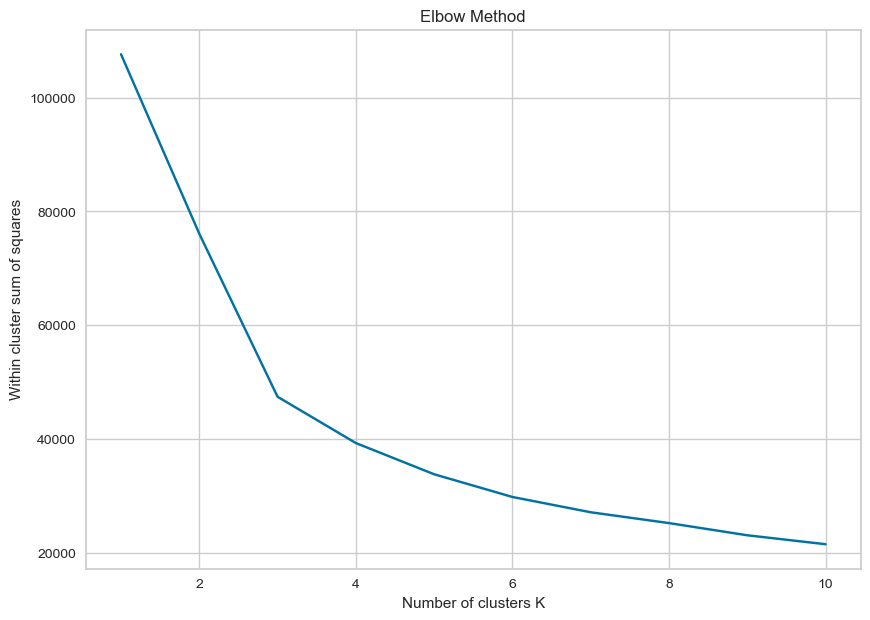

In [28]:
plt.figure(figsize=(10, 7))
plt.plot(results['K'], results['Within cluster sum of squares'])
plt.title("Elbow Method")
plt.xlabel("Number of clusters K")
plt.ylabel("Within cluster sum of squares")
plt.show()

/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/yellowbrick/style/colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/setuptools/_distutils/version.py:337: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/setuptools/_distutils/version.py:337: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X d

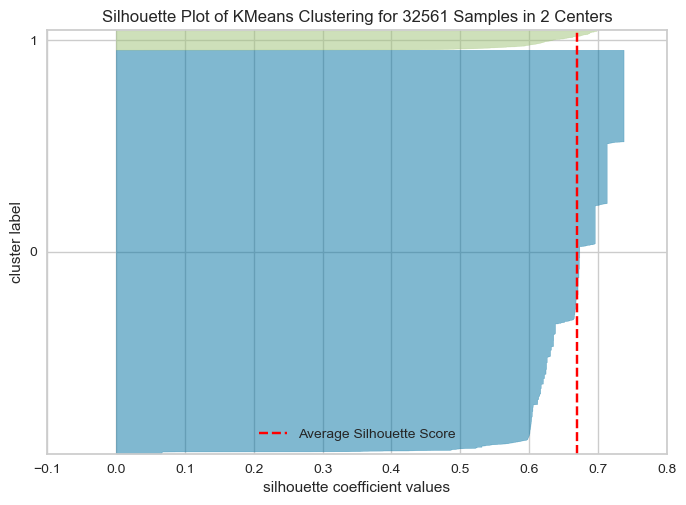

For a cluster of size 2, the overall average silhouette width is 0.7820343250639273 and the minimum per cluster average silhouette width is [0.7663250376313722]


/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


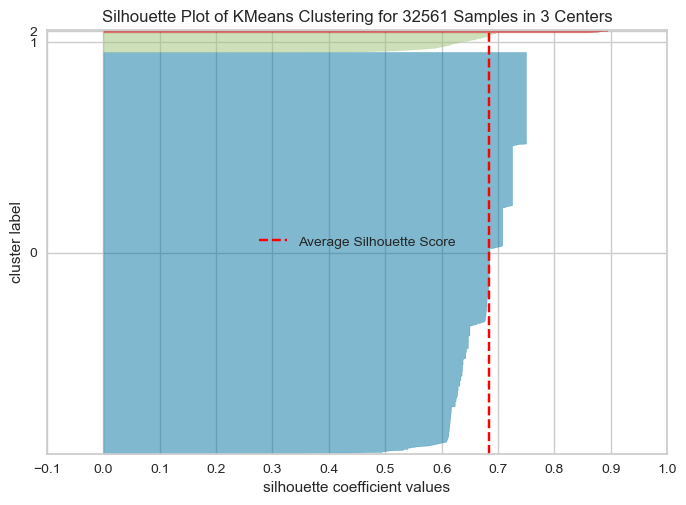

For a cluster of size 3, the overall average silhouette width is 0.8037245261488718 and the minimum per cluster average silhouette width is [0.7608671227110847]


/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


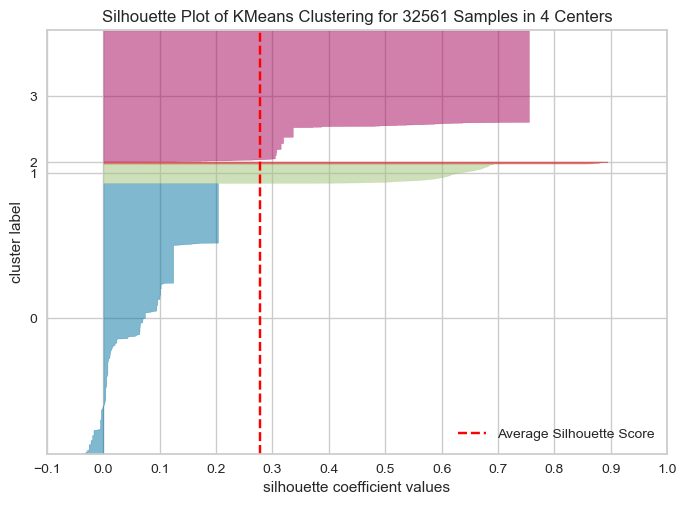

For a cluster of size 4, the overall average silhouette width is 0.4053605332795303 and the minimum per cluster average silhouette width is [0.3109264788427225]


/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


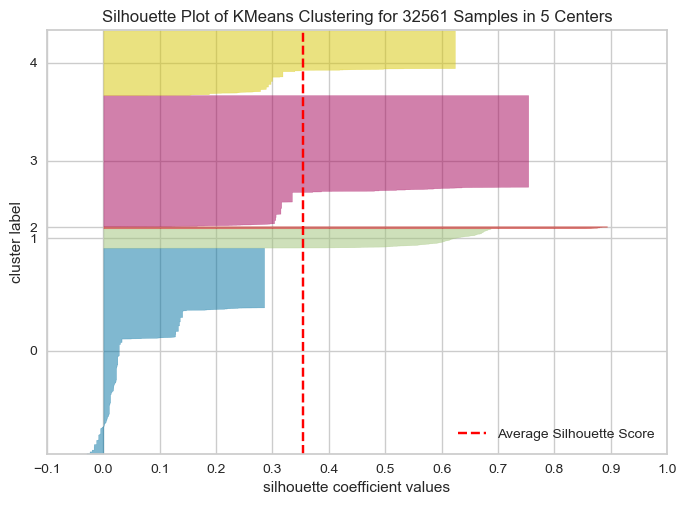

For a cluster of size 5, the overall average silhouette width is 0.3639693801048094 and the minimum per cluster average silhouette width is [0.19501227182486752]


/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


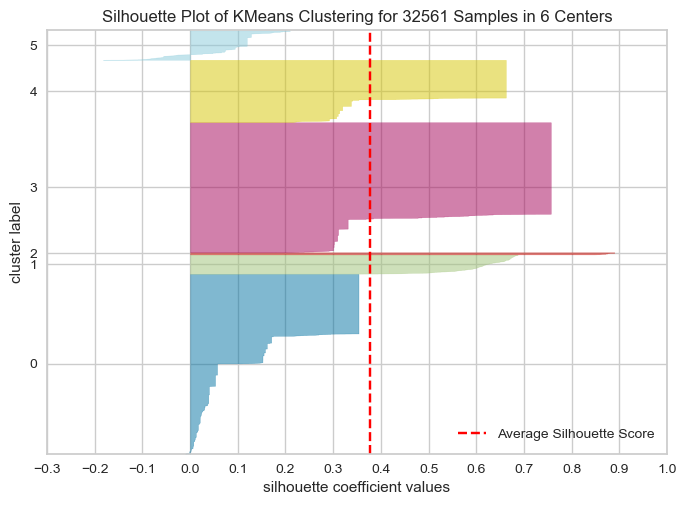

For a cluster of size 6, the overall average silhouette width is 0.3627660813652118 and the minimum per cluster average silhouette width is [0.09393596964533482]


/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


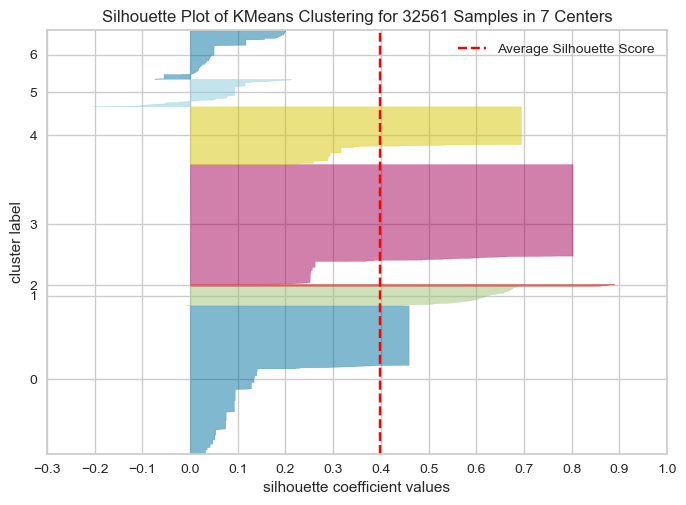

For a cluster of size 7, the overall average silhouette width is 0.37738966809228175 and the minimum per cluster average silhouette width is [-0.16178148024489344]


/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


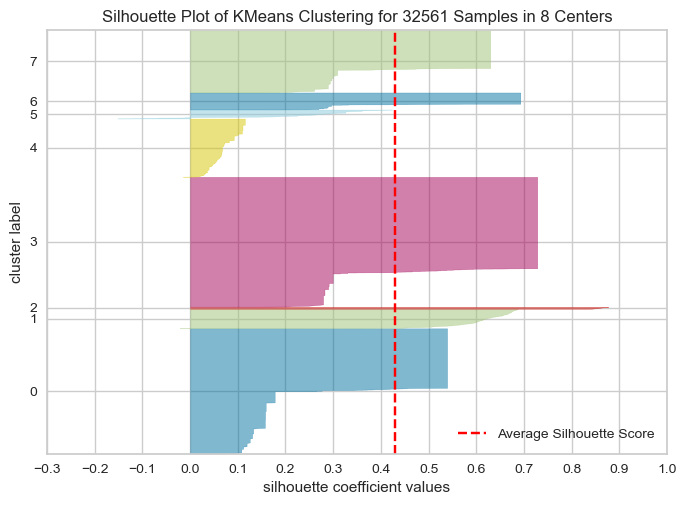

For a cluster of size 8, the overall average silhouette width is 0.367370413214581 and the minimum per cluster average silhouette width is [0.22811634052632235]


/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


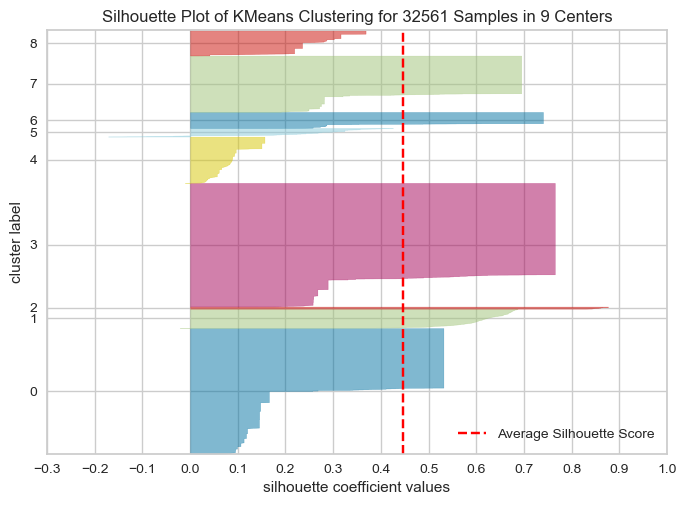

For a cluster of size 9, the overall average silhouette width is 0.36184281294464793 and the minimum per cluster average silhouette width is [0.20680776603187892]


/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


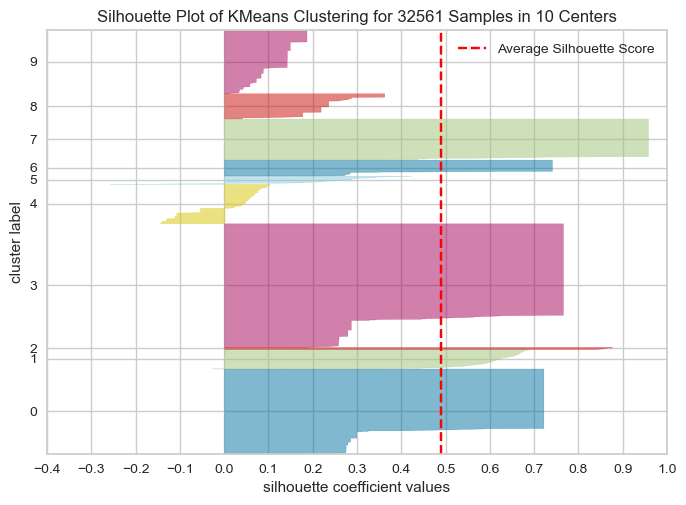

For a cluster of size 10, the overall average silhouette width is 0.4477670595288392 and the minimum per cluster average silhouette width is [0.16242365607559184]


In [22]:
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

d_matrix = distance_matrix(X_relevant, X_relevant)
# print(d_matrix)

overall_avg = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=100)
    labels = kmeans.fit_predict(X_relevant)

    silhouette_avg = silhouette_score(d_matrix, labels)
   
    overall_avg.append(silhouette_avg) # overall avg silhouette width

    samples = silhouette_samples(d_matrix, labels)

    min_avg = []
    for j in range(i):

        cluster_silhouette = samples[labels == j]
    
        min_avg.append(np.mean(cluster_silhouette))

    min_avg_all = []
    min_avg_all.append(min(min_avg)) # get the minimum of the average
   
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X_relevant)
    visualizer.show()
    print(f"For a cluster of size {i}, the overall average silhouette width is {silhouette_avg} and the minimum per cluster average silhouette width is {min_avg_all}")
    


In [ ]:
df_cleaned = df.dropna(how="any")

categorical_cols = ["Workclass", "Education", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Native-country", "Income"]
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].apply(lambda x: x.str.strip())

for col in categorical_cols:
    df_cleaned = df_cleaned[~df_cleaned[col].isin(['?'])]


X_relevant_cleaned = pd.DataFrame(X_transformed, columns=feature_names).iloc[df_cleaned.index]

optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, n_init=100, max_iter=300, random_state=0)
kmeans_labels = kmeans_final.fit_predict(X_relevant_cleaned)

df_cleaned['KMeans_Cluster'] = kmeans_labels

kmeans_cluster_analysis = df_cleaned.groupby('KMeans_Cluster').agg({
    'Income': lambda x: x.value_counts(normalize=True) if x.nunique() > 1 else 'N/A',
    'Workclass': lambda x: x.value_counts().idxmax() if x.nunique() > 1 else 'N/A',
    'Education': lambda x: x.value_counts().idxmax() if x.nunique() > 1 else 'N/A',
    'Age': 'mean',
    'Capital-gain': 'mean',
    'Capital-loss': 'mean',
    'Hours-per-week': 'mean'
})
print("K-Means Cluster Analysis:")
display(kmeans_cluster_analysis)

income_distribution = df_cleaned.groupby(['KMeans_Cluster', 'Income']).size().unstack(fill_value=0)

income_distribution['Proportion_>50K'] = income_distribution['>50K'] / income_distribution.sum(axis=1)
income_distribution['Proportion_<=50K'] = income_distribution['<=50K'] / income_distribution.sum(axis=1)

print("Income Distribution by Cluster:")
display(income_distribution)


df_cleaned['Income_Binary'] = df_cleaned['Income'].apply(lambda x: 1 if '>50K' in x else 0)

workclass_mobility_kmeans = df_cleaned.groupby(['KMeans_Cluster', 'Workclass'])['Income_Binary'].mean().reset_index()
workclass_mobility_kmeans.rename(columns={'Income_Binary': 'Proportion_Above_50K'}, inplace=True)

highest_mobility_kmeans = workclass_mobility_kmeans.loc[
    workclass_mobility_kmeans.groupby('KMeans_Cluster')['Proportion_Above_50K'].idxmax()
]
print("Workclass categories with highest upward mobility by K-Means cluster:")
display(highest_mobility_kmeans)

education_mobility_kmeans = df_cleaned.groupby(['KMeans_Cluster', 'Workclass', 'Education'])['Income_Binary'].mean().reset_index()
education_mobility_kmeans.rename(columns={'Income_Binary': 'Proportion_Above_50K'}, inplace=True)

print("Education and Workclass Mobility Analysis:")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  

education_mobility_kmeans_sorted = education_mobility_kmeans.sort_values(
    by=['KMeans_Cluster', 'Proportion_Above_50K'], 
    ascending=[True, False]
)

display(education_mobility_kmeans_sorted)


K-Means Cluster Analysis:


,Income,Workclass,Education,Age,Capital-gain,Capital-loss,Hours-per-week
KMeans_Cluster,,,,,,,
0,"[0.5276381909547738, 0.4723618090452261]",Private,HS-grad,41.590811,0.000000,1898.628141,43.624551
1,"[0.9396362182690385, 0.06036378173096142]",Private,HS-grad,32.741488,227.840629,1.066627,36.575188
2,"[0.5736191860465116, 0.42638081395348837]",Private,HS-grad,44.332195,2145.165770,0.341061,45.410029


Income Distribution by Cluster:


Income,<=50K,>50K,Proportion_>50K,Proportion_<=50K
KMeans_Cluster,,,,
0,658,735,0.527638,0.472183
1,14103,906,0.060364,0.939632
2,7893,5867,0.426381,0.573601


Workclass categories with highest upward mobility by K-Means cluster:


,KMeans_Cluster,Workclass,Proportion_Above_50K
3,0,Self-emp-inc,0.825000
10,1,Self-emp-not-inc,0.106830
16,2,Self-emp-inc,0.615385


Education and Workclass Mobility Analysis:


,KMeans_Cluster,Workclass,Education,Proportion_Above_50K
2,0,Federal-gov,Assoc-voc,1.000000
4,0,Federal-gov,Doctorate,1.000000
7,0,Federal-gov,Prof-school,1.000000
12,0,Local-gov,9th,1.000000
31,0,Private,Doctorate,1.000000
37,0,Self-emp-inc,10th,1.000000
38,0,Self-emp-inc,11th,1.000000
44,0,Self-emp-inc,Doctorate,1.000000
46,0,Self-emp-inc,Masters,1.000000
47,0,Self-emp-inc,Prof-school,1.000000


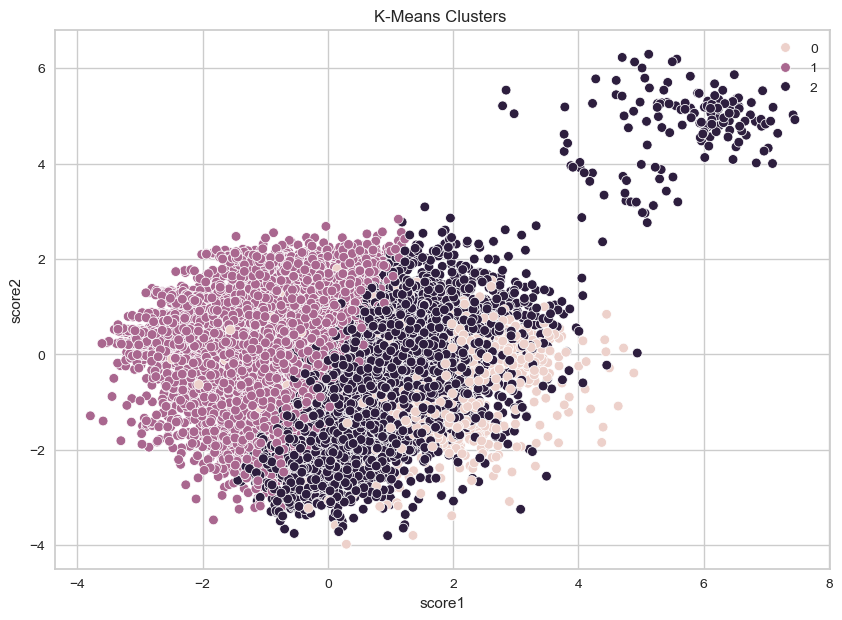

In [138]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_relevant_cleaned)

df_pca = pd.DataFrame(data=pca_transformed, columns=['score1', 'score2'])


plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='score1', y='score2', hue=kmeans_labels)
plt.title("K-Means Clusters ")

plt.xlabel('score1')
plt.ylabel('score2')
plt.show()


In [133]:

dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_relevant_cleaned)
df_cleaned['DBSCAN_Cluster'] = dbscan_labels


cluster_analysis = df_cleaned.groupby('DBSCAN_Cluster').agg({
    'Income': lambda x: x.value_counts(normalize=True) if x.nunique() > 1 else 'N/A',
    'Workclass': lambda x: x.value_counts().idxmax() if x.nunique() > 1 else 'N/A',
    'Education': lambda x: x.value_counts().idxmax() if x.nunique() > 1 else 'N/A',
    'Age': 'mean',
    'Capital-gain': 'mean',
    'Capital-loss': 'mean',
    'Hours-per-week': 'mean'
})
display(cluster_analysis)

income_distribution = df_cleaned.groupby(['DBSCAN_Cluster', 'Income']).size().unstack(fill_value=0)

income_distribution['Proportion_>50K'] = income_distribution['>50K'] / income_distribution.sum(axis=1)
income_distribution['Proportion_<=50K'] = income_distribution['<=50K'] / income_distribution.sum(axis=1)

print("Income Distribution by Cluster:")
display(income_distribution)

df_cleaned['Income_Binary'] = df_cleaned['Income'].apply(lambda x: 1 if '>50K' in x else 0)

workclass_mobility = df_cleaned.groupby(['DBSCAN_Cluster', 'Workclass'])['Income_Binary'].mean().reset_index()
workclass_mobility.rename(columns={'Income_Binary': 'Proportion_Above_50K'}, inplace=True)

highest_mobility = workclass_mobility.loc[
    workclass_mobility.groupby('DBSCAN_Cluster')['Proportion_Above_50K'].idxmax()
]
print("Workclass categories with highest upward mobility by cluster:")
display(highest_mobility)

education_mobility = df_cleaned.groupby(['DBSCAN_Cluster', 'Workclass', 'Education'])['Income_Binary'].mean().reset_index()
education_mobility.rename(columns={'Income_Binary': 'Proportion_Above_50K'}, inplace=True)
education_mobility_sorted = education_mobility.sort_values(
    by=['DBSCAN_Cluster', 'Proportion_Above_50K'], 
    ascending=[True, False]
)
display(education_mobility_sorted)




,Income,Workclass,Education,Age,Capital-gain,Capital-loss,Hours-per-week
DBSCAN_Cluster,,,,,,,
-1,"[0.7666666666666667, 0.23333333333333334]",Private,HS-grad,54.933333,12837.333333,1613.300000,37.466667
0,"[0.7547188688054426, 0.24528113119455747]",Private,HS-grad,38.384513,598.684953,87.277129,40.888515
1,N/A,Private,Prof-school,46.013699,99999.000000,0.000000,50.417808


Income Distribution by Cluster:


Income,<=50K,>50K,Proportion_>50K,Proportion_<=50K
DBSCAN_Cluster,,,,
-1,23,7,0.233333,0.760750
0,22631,7355,0.245281,0.754713
1,0,146,1.000000,0.000000


Workclass categories with highest upward mobility by cluster:


,DBSCAN_Cluster,Workclass,Proportion_Above_50K
5,-1,State-gov,1.000000
9,0,Self-emp-inc,0.544316
13,1,Local-gov,1.000000


,DBSCAN_Cluster,Workclass,Education,Proportion_Above_50K
1,-1,Federal-gov,Prof-school,1.000000
9,-1,Self-emp-inc,10th,1.000000
14,-1,Self-emp-not-inc,HS-grad,1.000000
17,-1,State-gov,Doctorate,1.000000
13,-1,Self-emp-not-inc,Bachelors,0.666667
15,-1,Self-emp-not-inc,Masters,0.500000
0,-1,Federal-gov,HS-grad,0.000000
2,-1,Local-gov,10th,0.000000
3,-1,Private,10th,0.000000
4,-1,Private,1st-4th,0.000000


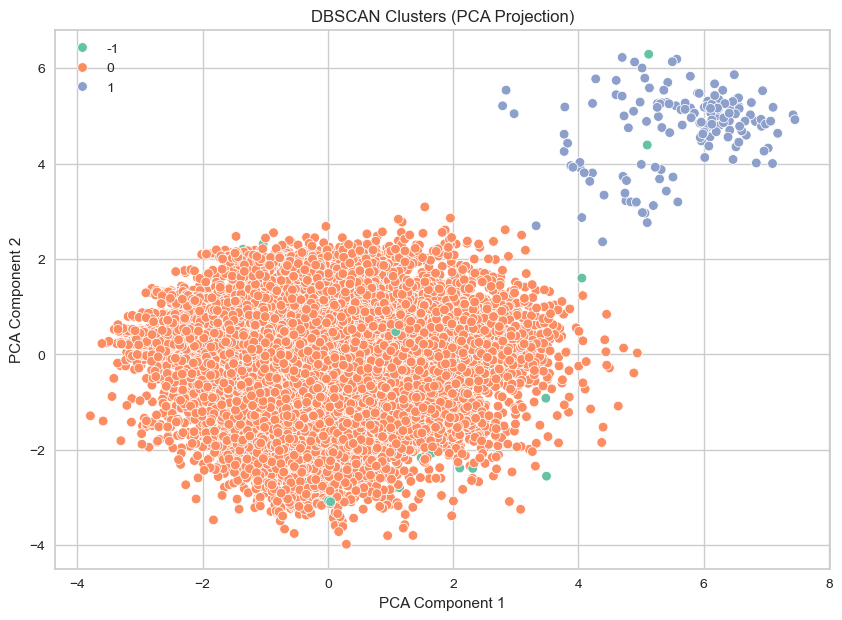

In [139]:
# visualize dbscan
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_relevant_cleaned)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette="Set2")
plt.title("DBSCAN Clusters (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [123]:
from mlxtend.frequent_patterns import apriori, association_rules

onehot_df = pd.get_dummies(df_cleaned[['Workclass', 'Education', 'Income']])


frequent_itemsets = apriori(onehot_df, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

rules_income = rules[rules['consequents'].apply(lambda x: 'Income_>50K' in x)]
rules_lower_income = rules[rules['consequents'].apply(lambda x: 'Income_<=50K' in x)]

rules_income['Proportion_Above_50K'] = rules_income['confidence']

rules = rules.sort_values('lift', ascending=False).head(75)
display(rules)

rules_income = rules_income.sort_values('lift', ascending=False).head(75)
display(rules_income)

rules_lower_income = rules_lower_income.sort_values('lift', ascending=False).head(75)
display(rules_lower_income)




,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,"(Income_<=50K, Workclass_Private)",(Education_HS-grad),0.577216,0.326238,0.217724,0.377197,1.156201,0.029414,1.081822,0.319545
13,(Education_HS-grad),"(Income_<=50K, Workclass_Private)",0.326238,0.577216,0.217724,0.667378,1.156201,0.029414,1.271064,0.200514
11,"(Workclass_Private, Education_HS-grad)",(Income_<=50K),0.254559,0.751078,0.217724,0.855301,1.138765,0.026531,1.720276,0.163468
14,(Income_<=50K),"(Workclass_Private, Education_HS-grad)",0.751078,0.254559,0.217724,0.289883,1.138765,0.026531,1.049744,0.489533
6,(Income_<=50K),(Education_HS-grad),0.751078,0.326238,0.272628,0.362982,1.112629,0.027598,1.057681,0.406664
7,(Education_HS-grad),(Income_<=50K),0.326238,0.751078,0.272628,0.835671,1.112629,0.027598,1.514779,0.150243
20,(Income_<=50K),"(Workclass_Private, Education_Some-college)",0.751078,0.166302,0.136098,0.181204,1.089609,0.011193,1.018200,0.330384
17,"(Workclass_Private, Education_Some-college)",(Income_<=50K),0.166302,0.751078,0.136098,0.818381,1.089609,0.011193,1.370576,0.098645
10,"(Income_<=50K, Education_HS-grad)",(Workclass_Private),0.272628,0.738877,0.217724,0.798614,1.080848,0.016286,1.296628,0.102837
15,(Workclass_Private),"(Income_<=50K, Education_HS-grad)",0.738877,0.272628,0.217724,0.294669,1.080848,0.016286,1.031250,0.286458


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,Proportion_Above_50K


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,(Education_HS-grad),"(Income_<=50K, Workclass_Private)",0.326238,0.577216,0.217724,0.667378,1.156201,0.029414,1.271064,0.200514
11,"(Workclass_Private, Education_HS-grad)",(Income_<=50K),0.254559,0.751078,0.217724,0.855301,1.138765,0.026531,1.720276,0.163468
7,(Education_HS-grad),(Income_<=50K),0.326238,0.751078,0.272628,0.835671,1.112629,0.027598,1.514779,0.150243
17,"(Workclass_Private, Education_Some-college)",(Income_<=50K),0.166302,0.751078,0.136098,0.818381,1.089609,0.011193,1.370576,0.098645
15,(Workclass_Private),"(Income_<=50K, Education_HS-grad)",0.738877,0.272628,0.217724,0.294669,1.080848,0.016286,1.031250,0.286458
9,(Education_Some-college),(Income_<=50K),0.221404,0.751078,0.177110,0.799940,1.065057,0.010818,1.244240,0.078453
19,(Education_Some-college),"(Income_<=50K, Workclass_Private)",0.221404,0.577216,0.136098,0.614705,1.064947,0.008300,1.097299,0.078329
5,(Workclass_Private),(Income_<=50K),0.738877,0.751078,0.577216,0.781208,1.040116,0.022263,1.137713,0.147704
21,(Workclass_Private),"(Income_<=50K, Education_Some-college)",0.738877,0.177110,0.136098,0.184196,1.040009,0.005236,1.008686,0.147326


# Q4

How does marital-status affect capital-gain, capital-loss, and income?

By utilizing t-SNE, k-means, and DBSCAN methods, we can investigate  the impact of marital-status on economic outcomes. 


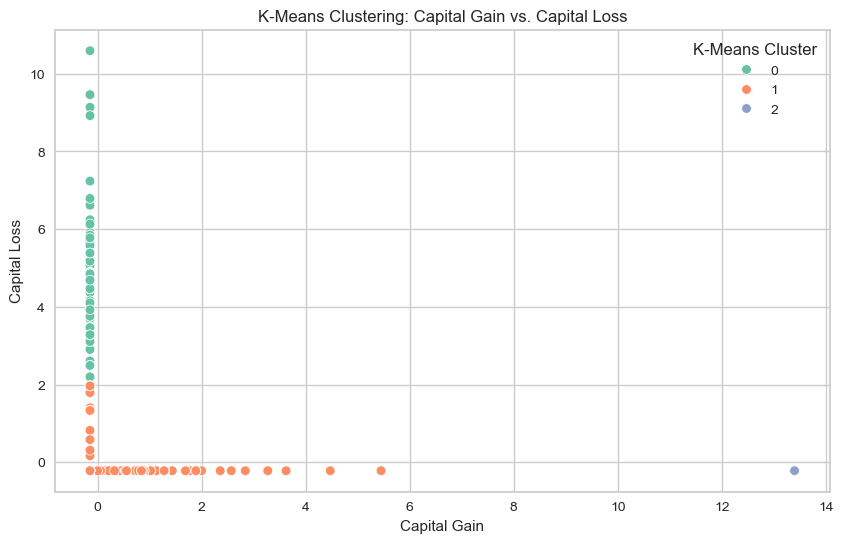

In [99]:
# df_new = pd.DataFrame(X_transformed, columns=feature_names)

# relevant_columns = [
#     col for col in feature_names
#     if col.startswith('cat__Marital-status_') or  
#        col in ['num__Capital-gain', 'num__Capital-loss'] 
# ]

# # X_relevant = pd.DataFrame(X_transformed, columns=feature_names)[relevant_columns]
# X_relevant_cleaned = pd.DataFrame(X_transformed, columns=feature_names).iloc[df_cleaned.index]

# X_relevant_cleaned['Income_Binary'] = df_cleaned['Income'].apply(lambda x: 1 if '>50K' in x else 0)
# kmeans = KMeans(n_clusters=3, random_state=42, n_init=100, max_iter=300)
# kmeans_labels = kmeans.fit_predict(X_relevant_cleaned)
# X_relevant_cleaned['KMeans_Cluster'] = kmeans_labels

# plt.figure(figsize=(10, 6))
# sns.scatterplot(
#     x=X_relevant_cleaned['num__Capital-gain'],
#     y=X_relevant_cleaned['num__Capital-loss'],
#     hue=kmeans_labels,
#     palette="Set2",
#     legend="full"
# )
# plt.title("K-Means Clustering: Capital Gain vs Capital Loss")
# plt.xlabel("Capital Gain")
# plt.ylabel("Capital Loss")
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Extract relevant columns for clustering
relevant_columns = [
    col for col in feature_names
    if col.startswith('cat__Marital-status_') or  
       col in ['num__Capital-gain', 'num__Capital-loss']
]
X_relevant = X_relevant_cleaned[relevant_columns]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=100, max_iter=300)
kmeans_labels = kmeans.fit_predict(X_relevant)

# Add cluster labels to a copy of the data
X_relevant_cleaned_copy = X_relevant_cleaned.copy()
X_relevant_cleaned_copy['KMeans_Cluster'] = kmeans_labels

# Plot Capital Gain vs. Capital Loss with K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_relevant_cleaned_copy['num__Capital-gain'],
    y=X_relevant_cleaned_copy['num__Capital-loss'],
    hue=X_relevant_cleaned_copy['KMeans_Cluster'],
    palette="Set2",
    legend="full"
)
plt.title("K-Means Clustering: Capital Gain vs. Capital Loss")
plt.xlabel("Capital Gain")
plt.ylabel("Capital Loss")
plt.legend(title="K-Means Cluster")
plt.show()


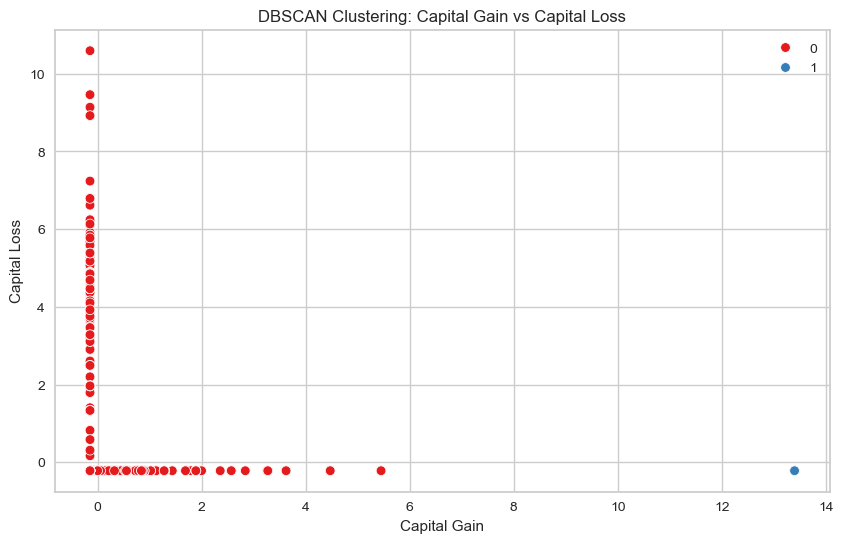

In [105]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_relevant)

# Add DBSCAN labels to the DataFrame
X_relevant_cleaned_copy['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_relevant_cleaned_copy['num__Capital-gain'],
    y=X_relevant_cleaned_copy['num__Capital-loss'],
    hue=dbscan_labels,
    palette="Set1",
    legend="full"
)
plt.title("DBSCAN Clustering: Capital Gain vs Capital Loss")
plt.xlabel("Capital Gain")
plt.ylabel("Capital Loss")
plt.show()

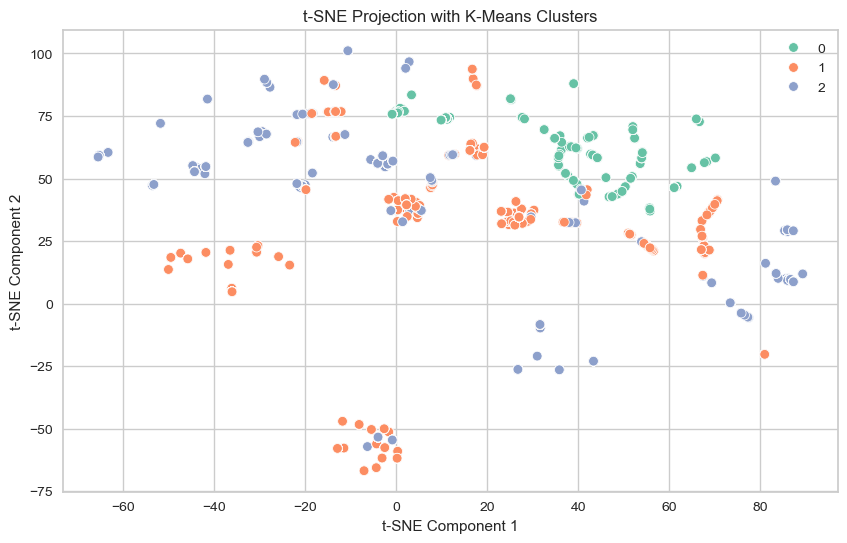

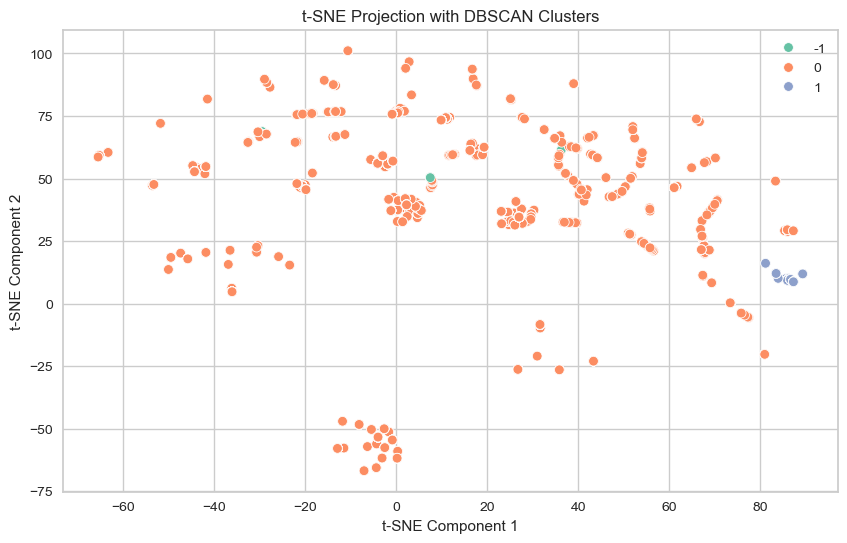

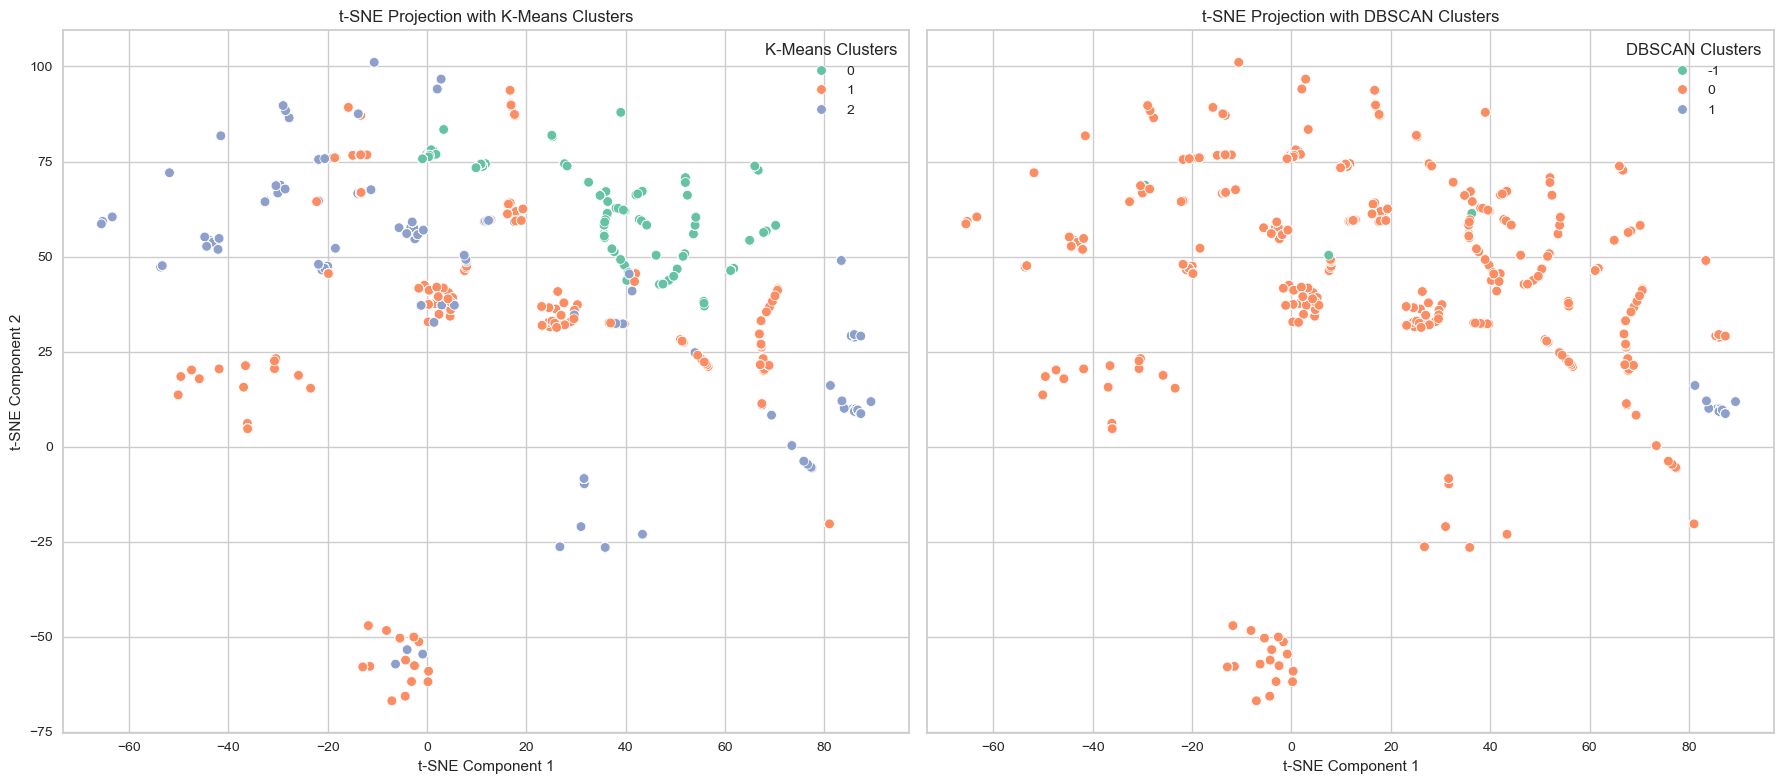

In [140]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_relevant)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=kmeans_labels, 
    palette="Set2",
    legend="full"
)
plt.title("t-SNE Projection with K-Means Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=dbscan_labels, 
    palette="Set2",
    legend="full"
)
plt.title("t-SNE Projection with DBSCAN Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

# Plotting K-Means and DBSCAN Clusters side-by-side using different axes
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)

# K-Means plot
sns.scatterplot(
    ax=axes[0],
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=kmeans_labels,
    palette="Set2",
    legend="full"
)
axes[0].set_title("t-SNE Projection with K-Means Clusters")
axes[0].set_xlabel("t-SNE Component 1")
axes[0].set_ylabel("t-SNE Component 2")
axes[0].legend(title="K-Means Clusters", loc="best")

# DBSCAN plot
sns.scatterplot(
    ax=axes[1],
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=dbscan_labels,
    palette="Set2",
    legend="full"
)
axes[1].set_title("t-SNE Projection with DBSCAN Clusters")
axes[1].set_xlabel("t-SNE Component 1")
axes[1].set_ylabel("t-SNE Component 2")  # Keep labels consistent
axes[1].legend(title="DBSCAN Clusters", loc="best")

plt.tight_layout()
plt.show()


In [106]:
from IPython.display import display


kmeans_marital_status = X_relevant_cleaned_copy.groupby('KMeans_Cluster')[
    [col for col in relevant_columns if col.startswith('cat__Marital-status_')]
].mean()


kmeans_marital_status.columns = [col.replace('cat__Marital-status_', '') for col in kmeans_marital_status.columns]

kmeans_combined = kmeans_marital_status.copy()
economic_metrics_kmeans = X_relevant_cleaned_copy.groupby('KMeans_Cluster').agg({
    'num__Capital-gain': 'mean',
    'num__Capital-loss': 'mean',
    'Income_Binary': 'mean'  
})
kmeans_combined = kmeans_combined.merge(economic_metrics_kmeans, left_index=True, right_index=True)



dbscan_marital_status = X_relevant_cleaned_copy.groupby('DBSCAN_Cluster')[
    [col for col in relevant_columns if col.startswith('cat__Marital-status_')]
].mean()

dbscan_marital_status.columns = [col.replace('cat__Marital-status_', '') for col in dbscan_marital_status.columns]

dbscan_combined = dbscan_marital_status.copy()
economic_metrics_dbscan = X_relevant_cleaned_copy.groupby('DBSCAN_Cluster').agg({
    'num__Capital-gain': 'mean',
    'num__Capital-loss': 'mean',
    'Income_Binary': 'mean' 
})
dbscan_combined = dbscan_combined.merge(economic_metrics_dbscan, left_index=True, right_index=True)

print("Combined Analysis for K-Means Clusters:")
display(kmeans_combined)

print("Combined Analysis for DBSCAN Clusters:")
display(dbscan_combined)


Combined Analysis for K-Means Clusters:


,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,num__Capital-gain,num__Capital-loss,Income_Binary
KMeans_Cluster,,,,,,,,,,
0,0.101075,0.000000,0.650179,0.007885,0.201434,0.017921,0.021505,-0.145920,4.491824,0.526882
1,0.141934,0.000734,0.455502,0.012509,0.329641,0.031867,0.027814,-0.060107,-0.215033,0.231490
2,0.074324,0.000000,0.824324,0.006757,0.074324,0.013514,0.006757,13.394578,-0.216660,1.000000


Combined Analysis for DBSCAN Clusters:


,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,num__Capital-gain,num__Capital-loss,Income_Binary
DBSCAN_Cluster,,,,,,,,,,
0,0.140035,0.0007,0.464550,0.012294,0.323682,0.031219,0.027520,-0.064095,0.003733,0.245219
1,0.074324,0.0000,0.824324,0.006757,0.074324,0.013514,0.006757,13.394578,-0.216660,1.000000
